# Bitcoin and stocks data analysis

## Task 1: Bitcoin vs USD analysis 

### Importing relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('btc_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31-05-2019,8320.286133,8586.659180,8172.550781,8574.501953,8574.501953,2.536519e+10
1,01-06-2019,8573.839844,8625.600586,8481.578125,8564.016602,8564.016602,2.248830e+10
2,02-06-2019,8565.473633,8809.303711,8561.235352,8742.958008,8742.958008,2.026622e+10
3,03-06-2019,8741.747070,8743.500000,8204.185547,8208.995117,8208.995117,2.200451e+10
4,04-06-2019,8210.985352,8210.985352,7564.488770,7707.770996,7707.770996,2.460973e+10


In [16]:
data.tail()

,Date,Open,High,Low,Close
727,27-05-2021,39316.89063,40379.61719,37247.90234,38436.96875
728,28-05-2021,38507.08203,38856.96875,34779.03906,35697.60547
729,29-05-2021,35684.15625,37234.50000,33693.92969,34616.06641
730,30-05-2021,34607.40625,36400.66797,33520.73828,35678.12891
731,31-05-2021,35508.32031,37461.41797,34249.67969,36817.87500


We have got the data from 31 may 2019 to 31 may 2021

For this analysis i dont want to see how much v0lume is being traded and also the 'close' column and the 'adj close' columns look the same. Dropping these columns.

In [3]:
data.drop(['Adj Close','Volume'],axis = 1,inplace = True)

In [4]:
data.head()

,Date,Open,High,Low,Close
0,31-05-2019,8320.286133,8586.659180,8172.550781,8574.501953
1,01-06-2019,8573.839844,8625.600586,8481.578125,8564.016602
2,02-06-2019,8565.473633,8809.303711,8561.235352,8742.958008
3,03-06-2019,8741.747070,8743.500000,8204.185547,8208.995117
4,04-06-2019,8210.985352,8210.985352,7564.488770,7707.770996


Looks good. Now lets check out the dimensions of our data

In [5]:
data.shape

(732, 5)

Looks like our dataset contains 732 rows and 5 columns

Let us now look for some statistics of our data

In [6]:
data.describe()

,Open,High,Low,Close
count,728.000000,728.000000,728.000000,728.000000
mean,18156.690886,18673.290947,17587.389517,18192.631907
std,16163.556246,16695.754199,15522.152724,16171.111953
min,5002.578125,5331.833984,4106.980957,4970.788086
25%,8808.448486,8955.431152,8661.263428,8806.478271
50%,10262.078615,10436.166990,10042.510740,10271.604495
75%,18570.303225,18923.818358,18066.694827,18626.543943
max,63523.753910,64863.097660,62208.964840,63503.457030


Checking for null values

In [10]:
data.isnull().sum()

Date     0
Open     4
High     4
Low      4
Close    4
dtype: int64

Looks like our data has some missing values. The reason behind it could be that at that day the market was not open. Anyways it won't affect our analysis but still dropping null values.

In [11]:
data.dropna(inplace = True)

In [12]:
#Checking to see if the null values are dropped
data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

There you go. Now we can continue with our analysis
At first i am intersted in the closing trend of bitcoin

### Exploratory data analysis 

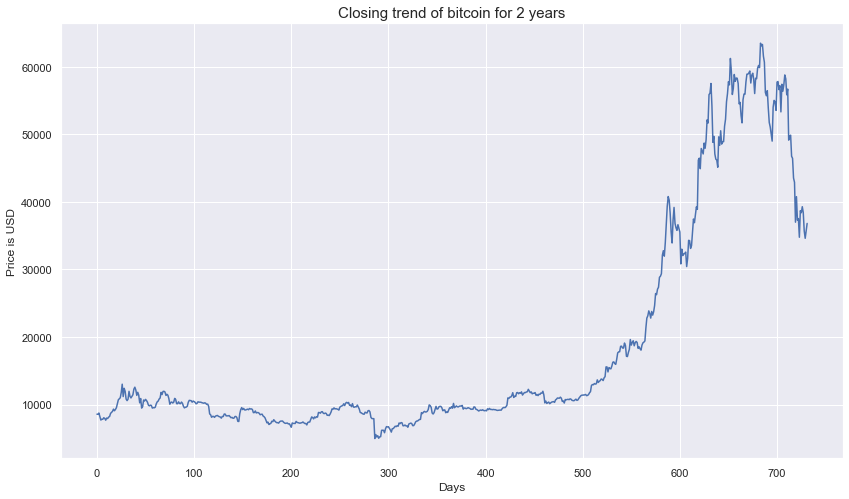

In [17]:
#Plotting the closing trend of bitcoin
plt.figure(figsize = (14,8))
plt.plot(data['Close'])
plt.title('Closing trend of bitcoin for 2 years', fontsize = 15)
plt.xlabel('Days')
plt.ylabel('Price is USD')
plt.show()

As we can see that there are a lot of spikes in our graph and bitcoin reached its peak at somewhere around day 670 and then started falling after that

Now let's have a look at the open price vs the close price

In [18]:
df_oc = data[['Open','Close']]
df_oc

,Open,Close
0,8320.286133,8574.501953
1,8573.839844,8564.016602
2,8565.473633,8742.958008
3,8741.747070,8208.995117
4,8210.985352,7707.770996
...,...,...
727,39316.890630,38436.968750
728,38507.082030,35697.605470
729,35684.156250,34616.066410
730,34607.406250,35678.128910


Now that we have got our separate dataframe for opening and closing trends let us plot them

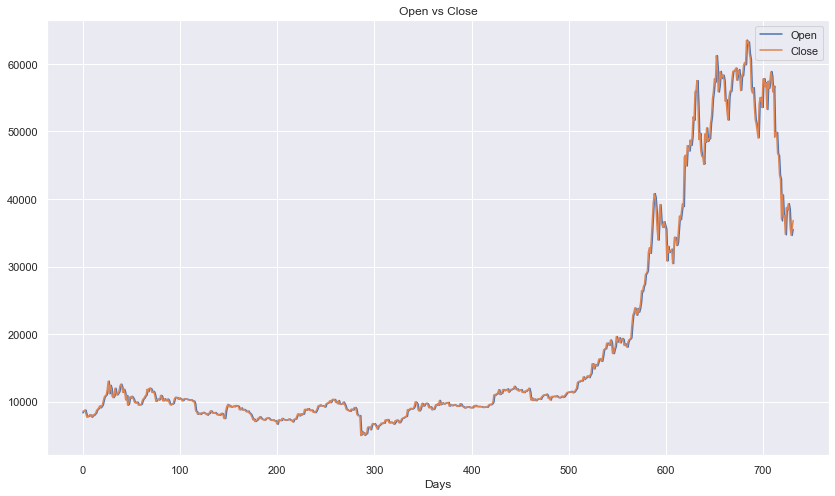

In [19]:
plt.figure(figsize = (14,8))
for column in df_oc.columns.values:
    plt.plot(df_oc[column], label = column)

plt.title("Open vs Close")
plt.xlabel("Days")
plt.legend(df_oc.columns.values)
plt.show()

As we can see from above graph that there's not much of a difference in the open and close prices of bitcoin for that same day

Let us now get the daily returns of bitcoin

In [20]:
daily_return = data['Close'].pct_change(1)
daily_return

0           NaN
1     -0.001223
2      0.020895
3     -0.061073
4     -0.061058
         ...   
727   -0.021816
728   -0.071269
729   -0.030297
730    0.030681
731    0.031945
Name: Close, Length: 728, dtype: float64

This series object does not give us any information. So let's visualise the daily returns

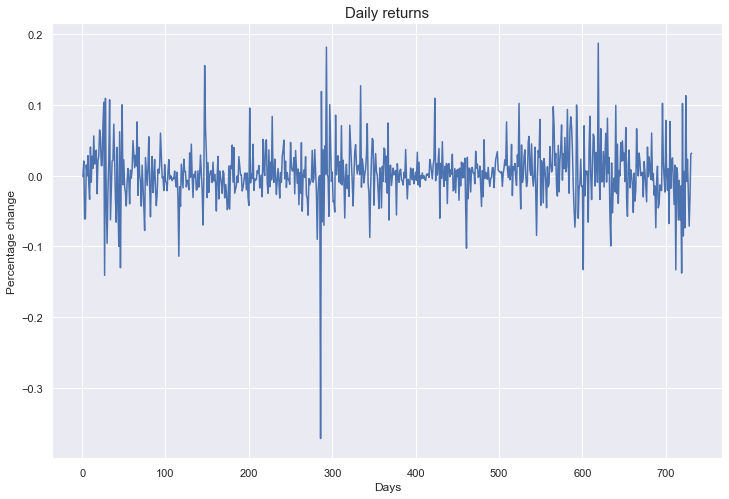

In [29]:
plt.figure(figsize = (12,8))
plt.plot(daily_return)
plt.title('Daily returns',fontsize = 15)
plt.ylabel('Percentage change')
plt.xlabel('Days')
plt.show()

As we can see there are quite a few spikes in our graph but the biggest spike was around day 290 and also its a negative spike

Getting the daily cumulative returns in order to get more insights from the data

In [27]:
daily_cum_return = (daily_return+1).cumprod()
daily_cum_return

0           NaN
1      0.998777
2      1.019646
3      0.957373
4      0.898918
         ...   
727    4.482706
728    4.163228
729    4.037094
730    4.160956
731    4.293879
Name: Close, Length: 728, dtype: float64

Visualising the cumulative returns

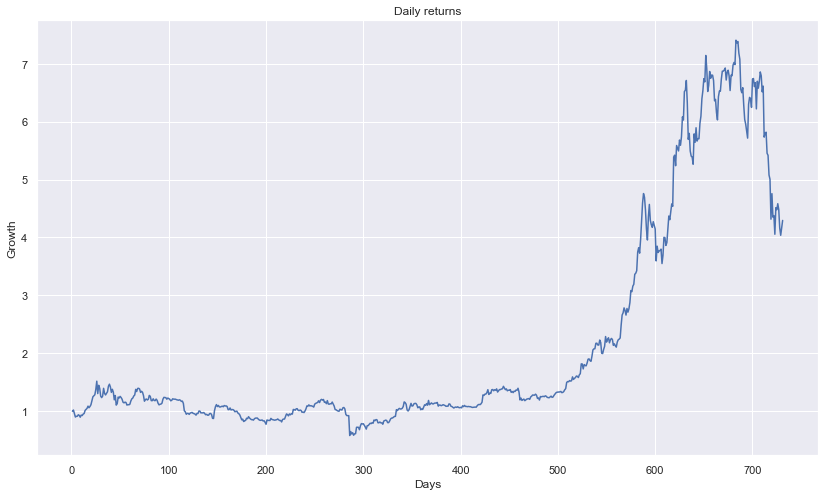

In [32]:
plt.figure(figsize = (14,8))
plt.plot(daily_cum_return)
plt.title("Daily returns")
plt.xlabel('Days')
plt.ylabel('Growth')
plt.show()

**Inferences**:- As we can see from the above graph if we would have invested a 100 dollars two years ago in bitcoin we would have got back around 400 dollars today.

Bitcoin recently saw its peak but has fallen significantly in the last couple of weeks.

**Future scope** - In future we could analyse bitcoin against other cryptocurrencies like etherium and dogecoin and figure out other factors which drive the prices of these cryptos.

## Stocks analysis 

In this project i am interested in looking at the stocks of the five of the most famous companies i.e. Facebook, Netflix, Tesla, Microsoft and Amazon

In [47]:
#importing IexFinance library
from iexfinance.stocks import get_historical_data
import datetime
token = 'pk_a4ac5c6c496b499ebd1dc816f7a9ca22'

In [48]:
start = datetime.date(2019,5,31)
end = datetime.date(2021,6,1)

Let us clean our dataframe in order to get what we want

In [40]:
df_fb = FB[['close','high','low','open']]
df_fb.head()

,close,high,low,open
2019-05-31,177.47,180.54,177.16,180.28
2019-06-03,164.15,175.05,161.01,175
2019-06-04,167.5,168.28,160.84,163.71
2019-06-05,168.17,168.72,164.63,167.48
2019-06-06,168.33,169.7,167.23,168.3


Now lets do this for all the stocks we are interested in

In [ ]:
NFLX = get_historical_data('NFLX', output_format = 'pandas', token = token, start = start, end = end)
MSFT = get_historical_data('MSFT', output_format = 'pandas', token = token, start = start, end = end)

At this point i had run out of all the credits so let's just look at the stocks from facebook, netflix and microsoft

In [50]:
MSFT.head()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2019-05-31,123.68,124.615,123.32,124.23,MSFT,26646769,HISTORICAL_PRICES,MSFT,,1621390692000,...,123.32,26646769,121.543,121.005,121.92,120.653,26646769,"May 31, 19",-2.05,-0.0163
2019-06-03,119.84,124.37,119.01,123.85,MSFT,37983637,HISTORICAL_PRICES,MSFT,,1621390708000,...,119.01,37983637,121.171,117.248,121.68,116.436,37983637,"Jun 3, 19",-3.84,-0.031
2019-06-04,123.16,123.28,120.652,121.28,MSFT,29382642,HISTORICAL_PRICES,MSFT,,1621390650000,...,120.652,29382642,118.657,120.496,120.614,118.043,29382642,"Jun 4, 19",3.32,0.0277
2019-06-05,125.83,125.87,124.21,124.95,MSFT,24926140,HISTORICAL_PRICES,MSFT,,1621390696000,...,124.21,24926140,122.248,123.108,123.148,121.523,24926140,"Jun 5, 19",2.67,0.0217
2019-06-06,127.82,127.97,125.6,126.44,MSFT,21458961,HISTORICAL_PRICES,MSFT,,1621390672000,...,125.6,21458961,123.705,125.055,125.202,122.883,21458961,"Jun 6, 19",1.99,0.0158


In [51]:
df_msft = MSFT[['close', 'high', 'low', 'open']]
df_msft.head()

,close,high,low,open
2019-05-31,123.68,124.615,123.32,124.23
2019-06-03,119.84,124.37,119.01,123.85
2019-06-04,123.16,123.28,120.652,121.28
2019-06-05,125.83,125.87,124.21,124.95
2019-06-06,127.82,127.97,125.6,126.44


In [53]:
df_nflx = NFLX[['close', 'high', 'low', 'open']]
df_nflx.head()

,close,high,low,open
2019-05-31,343.28,349.34,342.92,347.22
2019-06-03,336.63,347.66,332.65,343.56
2019-06-04,353.4,353.61,343.25,345
2019-06-05,355.73,357.88,348.71,354.38
2019-06-06,357.13,358.21,352.09,354.84


In [56]:
#checking for null values in our dataframes
df_fb.isna().sum()
df_msft.isna().sum()
df_nflx.isna().sum()

close    0
high     0
low      0
open     0
dtype: int64

Looks like our dataframes are already clean

 i am intersted in doing the analysis on only the closing trend of these stocks so let's first extract the closing prices and store it in a separate dataframe

In [57]:
closing_data = pd.DataFrame({'FB': df_fb['close'],
                              'MSFT': df_msft['close'],
                               'NFLX': df_nflx['close']})

In [58]:
closing_data.head()

,FB,MSFT,NFLX
2019-05-31,177.47,123.68,343.28
2019-06-03,164.15,119.84,336.63
2019-06-04,167.5,123.16,353.4
2019-06-05,168.17,125.83,355.73
2019-06-06,168.33,127.82,357.13


The values in the above column represents the closing price of the companies

In [59]:
#checking the dimensions of the data
closing_data.shape

(505, 3)

So our dataset contains 505 rows and 3 columns

### Exploratory Data Analysis

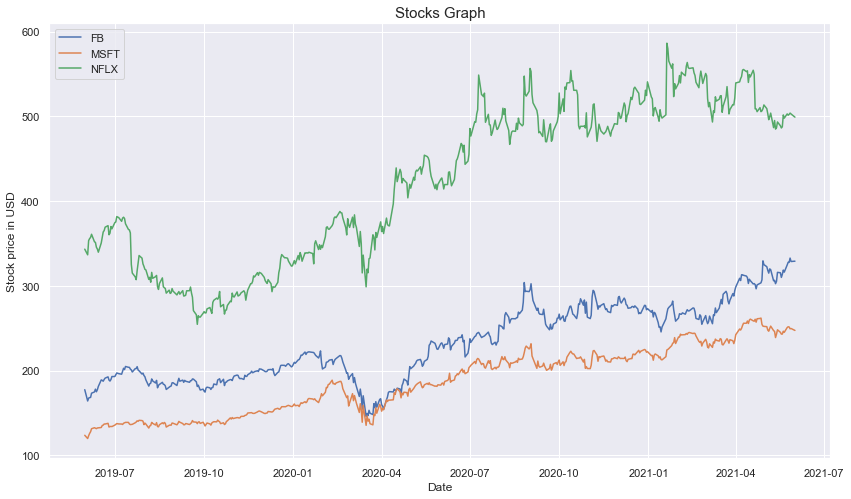

In [64]:
#Visualising the stocks closing prices
plt.figure(figsize = (14,8))
for column in closing_data.columns.values:
    plt.plot(closing_data[column], label = column)

plt.title('Stocks Graph',fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Stock price in USD')
plt.legend(closing_data.columns.values, loc = 'upper left')
plt.show()

From the above graph we get to know that out nof the three Netflix has the highest stock price followed by facebook and microsoft

As netflix stocks ar way higher than other two's let us try scaling the data and then visualise it

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,80))
scaled_data = scaler.fit_transform(closing_data)
scaled_data

array([[13.47756239,  2.16140153, 21.38718915],
       [ 7.77123273,  0.        , 19.78357197],
       [ 9.20638321,  1.86871174, 23.82758101],
       ...,
       [80.        , 72.87412932, 60.11032404],
       [78.27781943, 73.08238936, 59.85712133],
       [78.44918068, 71.7990572 , 58.95764883]])

In [66]:
type(scaled_data)

numpy.ndarray

As this a numpy array let us convert it to a dataframe

In [68]:
scaled_closing_data = pd.DataFrame(scaled_data,columns = closing_data.columns)

In [69]:
scaled_closing_data.head()

,FB,MSFT,NFLX
0,13.477562,2.161402,21.387189
1,7.771233,0.000000,19.783572
2,9.206383,1.868712,23.827581
3,9.493413,3.371561,24.389450
4,9.561958,4.491663,24.727054


Perfect!! Now since all the features are on the same scale let us plot them and see what we get

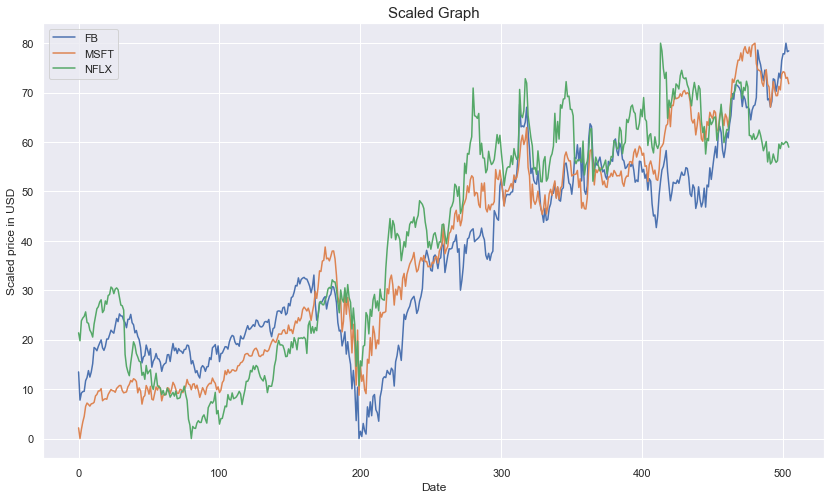

In [71]:
plt.figure(figsize = (14,8))
for column in scaled_closing_data.columns.values:
    plt.plot(scaled_closing_data[column], label = column)

plt.title('Scaled Graph', fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Scaled price in USD')
plt.legend(scaled_closing_data.columns.values)
plt.show()

From above graph looks like there is some corelation between the prices of the three companies

Let us look at the daily return of these stocks

In [72]:
daily_return_stocks = closing_data.pct_change()
daily_return_stocks

,FB,MSFT,NFLX
2019-05-31,NaN,NaN,NaN
2019-06-03,-0.075055,-0.031048,-0.019372
2019-06-04,0.020408,0.027704,0.049817
2019-06-05,0.004000,0.021679,0.006593
2019-06-06,0.000951,0.015815,0.003936
...,...,...,...
2021-05-25,0.009734,0.003748,-0.003102
2021-05-26,-0.000397,-0.000914,0.002035
2021-05-27,0.015534,-0.008668,0.002986
2021-05-28,-0.012081,0.001484,-0.002084


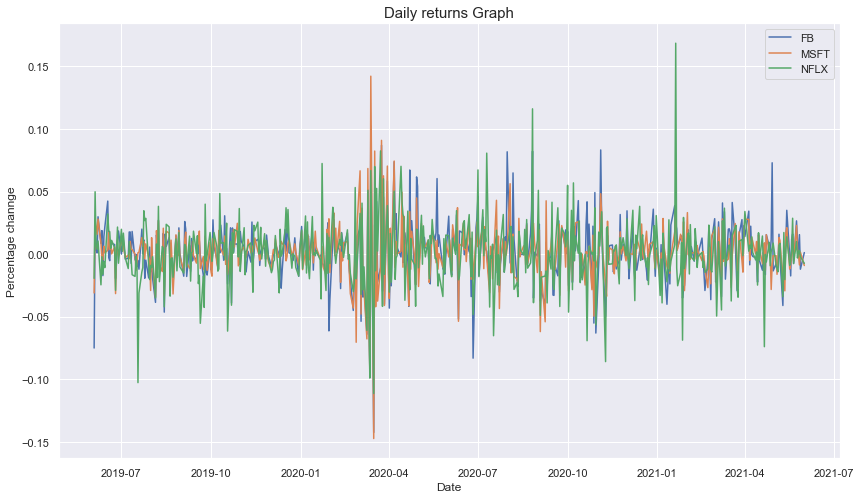

In [74]:
#Visualising the daily returns of the stocks
plt.figure(figsize = (14,8))
for column in daily_return_stocks.columns.values:
    plt.plot(daily_return_stocks[column], label = column)
    
plt.title('Daily returns Graph', fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Percentage channge')
plt.legend(daily_return_stocks.columns.values)
plt.show()

We can see from above graph that microsoft and netflix have some high and low spikes at march of 2020 and february of 2021

Let us now look how volatile are these stocks

In [75]:
daily_return_stocks.std()

FB      0.023967
MSFT    0.021660
NFLX    0.026297
dtype: float64

looks like all these stocks have the same kind of volatility

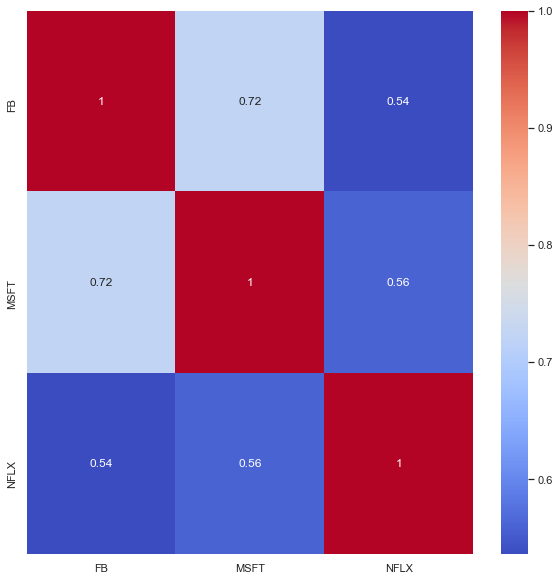

In [78]:
#Corelation between the three stocks
plt.figure(figsize = (10,10))
sns.heatmap(daily_return_stocks.corr(), annot = True, cmap = 'coolwarm')
plt.show()

Looks like the facebook and microsoft stocks are highly corelated with each other

Now let us look at what we would have got if we had invested 100 dollars in these stocks two years

In [79]:
#Daily returns cumulative
DRC = (daily_return_stocks+1).cumprod()
DRC

,FB,MSFT,NFLX
2019-05-31,NaN,NaN,NaN
2019-06-03,0.924945,0.968952,0.980628
2019-06-04,0.943821,0.995796,1.029480
2019-06-05,0.947597,1.017384,1.036268
2019-06-06,0.948498,1.033473,1.040346
...,...,...,...
2021-05-25,1.847016,2.035252,1.460440
2021-05-26,1.846284,2.033393,1.463412
2021-05-27,1.874965,2.015766,1.467781
2021-05-28,1.852313,2.018758,1.464723


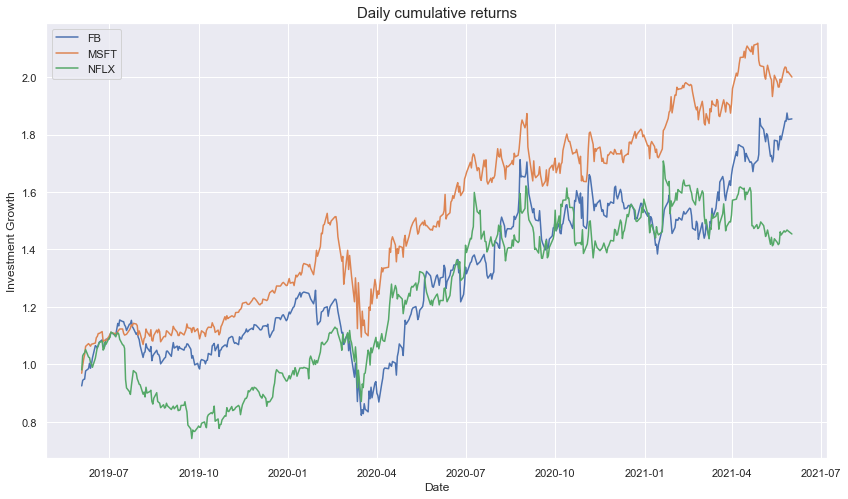

In [80]:
#visualising the cumulative daily returns
plt.figure(figsize = (14,8))
for column in DRC.columns.values:
     plt.plot(DRC[column], label = column)
    
plt.title('Daily cumulative returns', fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Investment Growth')
plt.legend(DRC.columns.values)
plt.show()
    

As we can infer from the graph surprisingly enough microsoft yields the most returns and netflix the lowest



So if we would have invested a **100 dollars** in each of these companies two years ago, **Microsoft** would have gotten us **200 dollars**, **Facebook** had gotten us around **170 dollars** and surprisingly enough **Netflix** would have gotten us nearly **150 dollars**

Inferences - Although Netflix has the highest stock price in today's date it yields us less returns. So it would be beneficial for one to invest the stocks of microsoft and facebook as the volatility of all these stocks is the same